Loading the final Data derived from the feature extraction function

In [1]:
# importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

f_data = pd.read_csv('datasets/leg_phish_urls.csv')
f_data.head()

,Domain,Have_IP,Have_At,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,geocities.com,0,0,2,0,0,0,0,1,1,1,0,1,1,1,0
1,google.com,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0
2,NaN,0,0,2,0,0,0,0,1,1,1,0,1,1,0,0
3,figma.com,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0
4,bing.com,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0


In [3]:
f_data.shape

(50, 16)

In [4]:
f_data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'Label'],
      dtype='object')

In [5]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         18 non-null     object
 1   Have_IP        50 non-null     int64 
 2   Have_At        50 non-null     int64 
 3   URL_Length     50 non-null     int64 
 4   Redirection    50 non-null     int64 
 5   https_Domain   50 non-null     int64 
 6   TinyURL        50 non-null     int64 
 7   Prefix/Suffix  50 non-null     int64 
 8   DNS_Record     50 non-null     int64 
 9   Domain_Age     50 non-null     int64 
 10  Domain_End     50 non-null     int64 
 11  iFrame         50 non-null     int64 
 12  Mouse_Over     50 non-null     int64 
 13  Right_Click    50 non-null     int64 
 14  Web_Forwards   50 non-null     int64 
 15  Label          50 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 6.4+ KB


Data Preprocessing

In [6]:
f_data.describe()

,Have_IP,Have_At,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.0,50.0,50.000000,50.000000
mean,0.0,0.100000,0.700000,0.060000,0.020000,0.040000,0.160000,1.0,1.0,1.0,0.580000,1.0,1.0,0.400000,0.500000
std,0.0,0.303046,0.677631,0.239898,0.141421,0.197949,0.370328,0.0,0.0,0.0,0.498569,0.0,0.0,0.494872,0.505076
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,1.0,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,1.0,1.0,0.000000,0.000000
50%,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,0.000000,0.500000
75%,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000
max,0.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000


In [7]:
# Dropping the Domain column

f_data = f_data.drop(['Domain'], axis = 1).copy()

In [8]:
#c hecking the data for null or missing values

f_data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [9]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed

data = f_data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0
2,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1
3,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0
4,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0


Data Splitting

In [11]:
# Sepratating & assigning features and target columns to X & y

y = f_data['Label']
X = f_data.drop('Label', axis=1)
X.shape, y.shape

((50, 14), (50,))

In [12]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((40, 14), (10, 14))

In [35]:
X_train.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'Redirection', 'https_Domain',
       'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age', 'Domain_End',
       'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'],
      dtype='object')

ML Modelling

In [13]:
# importing packages

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [14]:
# Creating holders to store the model performance results

ml_Model = []
acc_train = []
acc_test = []
cf_train = []
cf_test = []

#function to call for storing the results
def storeResults(model, a, b):
  ml_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  cf_train.append(round(a, 3))
  cf_test.append(round(b, 3))

In [15]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 

clf = DecisionTreeClassifier(max_depth = 5)

# fit the model 

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
# predicting the target value from the model for the samples

y_test_tree_pred = clf.predict(X_test)
y_train_tree_pred = clf.predict(X_train)
     

In [18]:
# computing the accuracy of the model performance

acc_train_tree = accuracy_score(y_train, y_train_tree_pred)
acc_test_tree = accuracy_score(y_test, y_test_tree_pred)
conf_matrix_train_tree = confusion_matrix(y_train, y_train_tree_pred)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_tree_pred)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Confusion Matrix on training Data: ", (conf_matrix_train_tree))
print("Decision Tree: Confusion Matrix on test Data: ", (conf_matrix_test_tree))

Decision Tree: Accuracy on training Data: 0.950
Decision Tree: Accuracy on test Data: 0.800
Decision Tree: Confusion Matrix on training Data:  [[21  0]
 [ 2 17]]
Decision Tree: Confusion Matrix on test Data:  [[4 0]
 [2 4]]


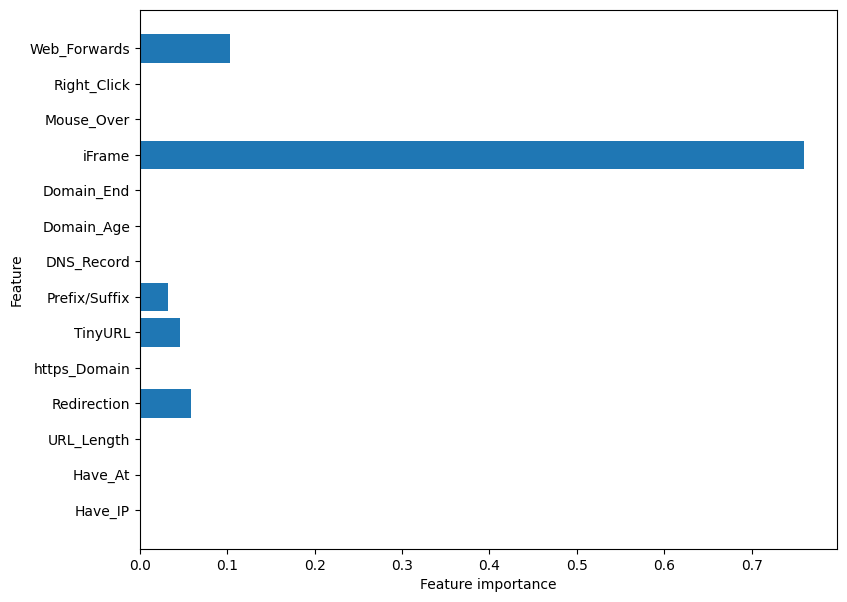

In [19]:
# checking the feature improtance in the model

plt.figure(figsize=(9, 7))
n_features = X_train.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [20]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.

storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [21]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier

# instantiate the model

rd_clf = RandomForestClassifier(max_depth=5)

# fit the model 

rd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples

y_test_rd = rd_clf.predict(X_test)
y_train_rd = rd_clf.predict(X_train)

In [23]:
# computing the accuracy of the model performance
acc_train_rd = accuracy_score(y_train, y_train_rd)
acc_test_rd = accuracy_score(y_test, y_test_rd)
conf_matrix_train_rd = confusion_matrix(y_train, y_train_rd)
conf_matrix_test_rd = confusion_matrix(y_test, y_test_rd)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_rd))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_rd))
print("Random forest: Confusion Matrix on training Data: ")
print(conf_matrix_train_rd)
print("Random forest: Confusion Matrix on test Data: ")
print(conf_matrix_test_rd)

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 0.900
Random forest: Confusion Matrix on training Data: 
[[21  0]
 [ 0 19]]
Random forest: Confusion Matrix on test Data: 
[[4 0]
 [1 5]]


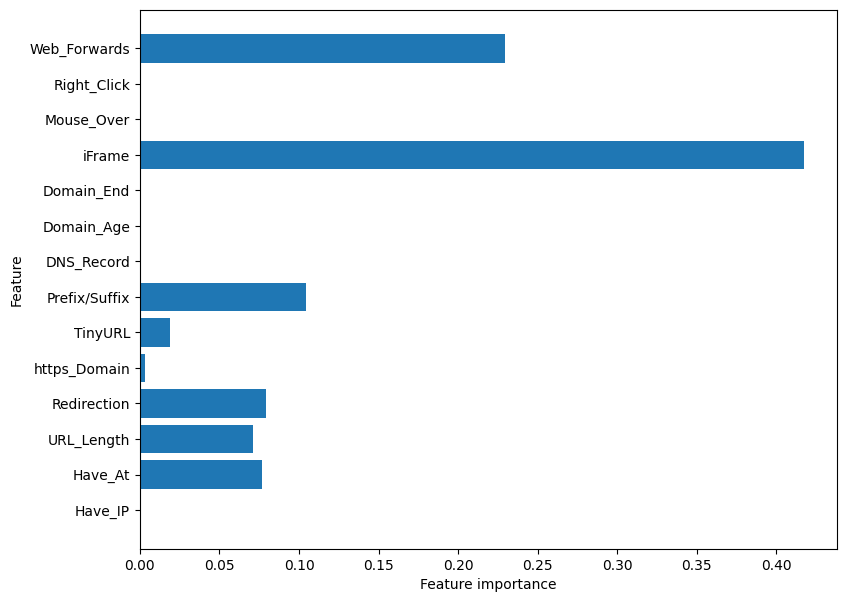

In [24]:
# checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rd_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.

storeResults('Random Forest', acc_train_rd, acc_test_rd)

In [26]:
# XGBoost Classification model

from xgboost import XGBClassifier

# instantiate the model

xgb_clf = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model

xgb_clf.fit(X_train, y_train)

c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fut

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
# predicting the target value from the model for the samples

y_test_xgb = xgb_clf.predict(X_test)
y_train_xgb = xgb_clf.predict(X_train)

c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\CODEWARE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fut

In [28]:
# computing the accuracy of the model performance

acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
conf_train_xgb = confusion_matrix(y_train, y_train_xgb)
conf_test_xgb = confusion_matrix(y_test, y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: Confusion Matrix on training Data: ")
print(conf_train_xgb)
print("XGBoost : Confusion Matrix on test Data: ")
print(conf_test_xgb)

XGBoost: Accuracy on training Data: 0.900
XGBoost : Accuracy on test Data: 0.800
XGBoost: Confusion Matrix on training Data: 
[[17  4]
 [ 0 19]]
XGBoost : Confusion Matrix on test Data: 
[[3 1]
 [1 5]]


In [29]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.

storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

Model Comparison

In [30]:
# To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.
# creating dataframe

results = pd.DataFrame({ 'ML Model': ml_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.95,0.8
1,Random Forest,1.00,0.9
2,XGBoost,0.90,0.8


In [31]:
# Sorting the datafram on accuracy

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,1.00,0.9
0,Decision Tree,0.95,0.8
2,XGBoost,0.90,0.8


In [32]:
# save Random Forest model to file
# From the comparison above, it can be concluded that Random Forest classifier works well with this dataset.

import pickle

pickle.dump(rd_clf, open("RandomForest.sav", "wb"))

In [34]:
# load model from file

loaded_model = pickle.load(open("RandomForest.sav", "rb"))

loaded_model.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)